<a href="https://colab.research.google.com/github/ChandraMaddikunta/garbage-classification/blob/master/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from contextlib import suppress

with suppress(Exception):
  %tensorflow_version 2.x
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
from google.colab import drive


drive.mount('/content/drive')
plt.style.use("seaborn")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATASET_DIR = "/content/drive/My Drive/split-garbage-dataset"

TRAIN_DIR = f"{DATASET_DIR}/train"
TEST_DIR = f"{DATASET_DIR}/test"
VALID_DIR = f"{DATASET_DIR}/valid"

In [0]:
LABELS = ["trash", "plastic", "paper", "metal", "glass", "cardboard"]

LABELS_NUMBERS_MAP = {k:v for k,v in zip(LABELS, range(len(LABELS)))}
LABELS_NUMBERS_REVERSE ={v: k for k, v in LABELS_NUMBERS_MAP.items()}

In [0]:
LOAD_FILES_FROM_DRIVE = False

In [0]:
import numpy as np
from skimage.io import imread_collection

#LOAD_FILES_FROM_DRIVE = True

if not LOAD_FILES_FROM_DRIVE:
    for path in [TRAIN_DIR, VALID_DIR, TEST_DIR]:
        image_list = [
            imread_collection(f"{path}/{label}/*.jpg") for label in LABELS
        ]
        X_tmp = np.concatenate(image_list)
        y_tmp = np.concatenate([
            np.full(len(arr), i) for i, arr in enumerate(image_list)
        ])
        data_type = path.split("/")[-1]
        np.save(f"X_{data_type}.npy", X_tmp)
        np.save(f"y_{data_type}.npy", y_tmp)

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_valid = np.load("X_valid.npy")
y_valid = np.load("y_valid.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [0]:
y_train = np.load("y_train.npy")
y_valid = np.load("y_valid.npy")
y_test = np.load("y_test.npy")

In [0]:
import matplotlib.pyplot as plt


def plot_images(X, y, grayscale=False, label_num_map=None):
    fig, axes = plt.subplots(1, len(X),  figsize=(20, 10))
    if grayscale:
        X_process = X.reshape(len(X_train), 384, 512) / 255
    else:
        X_process = X

    [ax.imshow(X_process[n]) for n, ax in enumerate(axes)]
    if not label_num_map:
        [ax.set_title((y[n])) for n, ax in enumerate(axes)]
    else:
        [ax.set_title((label_num_map[y[n]])) for n, ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]

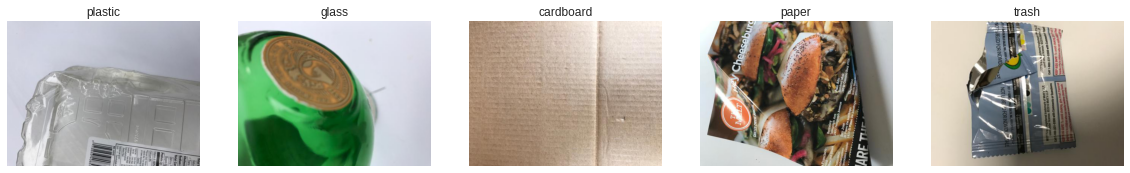

In [0]:
random_indexes = np.random.randint(0, len(X_train), 5)
plot_images(
    X=X_train[random_indexes], 
    y=y_train[random_indexes],
    label_num_map=LABELS_NUMBERS_REVERSE
)

In [0]:
y_train.max()

5

In [0]:
# LABELS_NUMBERS_REVERSE

In [0]:
LABELS_NUMBERS_MAP

{'cardboard': 5, 'glass': 4, 'metal': 3, 'paper': 2, 'plastic': 1, 'trash': 0}

In [0]:
X_test.shape

(431, 384, 512, 3)

In [0]:
X_train.shape

(1768, 384, 512, 3)

In [0]:
X_train[0]

array([[[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       ...,

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]],

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]],

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]]

In [0]:
from skimage.color import rgb2gray
X_train_g = rgb2gray(X_train)
X_test_g = rgb2gray(X_test)
X_valid_g = rgb2gray(X_valid)

In [0]:
X_train_g = X_train_g/255
X_test_g = X_test_g/255
X_valid_g = X_valid_g/255

In [0]:
X_train_g.shape

(1768, 384, 512)

In [0]:
X_test_g.shape

(431, 384, 512)

In [0]:
X_valid_g.shape

(328, 384, 512)

In [0]:
X_train_g = X_train_g.reshape(1768,384,512,1)
X_test_g = X_test_g.reshape(431,384,512,1)
X_valid_g = X_valid_g.reshape(328,384,512,1)

In [0]:
# y_train = keras.utils.to_categorical(y_train)
# y_valid = keras.utils.to_categorical(y_valid)
# y_test = keras.utils.to_categorical(y_test)

In [0]:
y_train_c = keras.utils.to_categorical(y_train, 6)
y_valid_c = keras.utils.to_categorical(y_valid, 6)
y_test_c = keras.utils.to_categorical(y_test, 6)

In [0]:
y_train_c.shape

(1768, 6)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.regularizers import l2

model = keras.Sequential([
    keras.layers.Convolution2D(64, 3, strides = 2,  padding= 'same', activation='relu', input_shape=(384, 512, 3)),
    #keras.layers.BatchNormalization(),
    keras.layers.Convolution2D(64, 3, strides = 2,  activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(128, 3, strides = 2, padding='same', activation='relu'),
    keras.layers.Convolution2D(128, 3, strides = 2,  activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(256, 3, strides = 2, padding='same', activation='relu'),
    #keras.layers.Convolution2D(128, 3, strides = 2, padding='same', activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(256, 3, strides = 2, padding="same", activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(2048, activation='relu'),
    #keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6,activation='softmax')
    ])


model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train_c, epochs=25, validation_data=(X_valid, y_valid_c))

Train on 1768 samples, validate on 328 samples
Epoch 1/25
1768/1768 [==============================] - 4s 2ms/sample - loss: 2.3973 - accuracy: 0.2404 - val_loss: 1.6956 - val_accuracy: 0.2591
Epoch 2/25
1768/1768 [==============================] - 3s 2ms/sample - loss: 1.5555 - accuracy: 0.3473 - val_loss: 1.6367 - val_accuracy: 0.3780
Epoch 3/25
1768/1768 [==============================] - 3s 2ms/sample - loss: 1.5359 - accuracy: 0.3671 - val_loss: 1.5101 - val_accuracy: 0.3811
Epoch 4/25
1768/1768 [==============================] - 3s 2ms/sample - loss: 1.4069 - accuracy: 0.4135 - val_loss: 1.4264 - val_accuracy: 0.4329
Epoch 5/25
1768/1768 [==============================] - 3s 2ms/sample - loss: 1.4242 - accuracy: 0.4225 - val_loss: 1.3611 - val_accuracy: 0.4817
Epoch 6/25
1768/1768 [==============================] - 3s 2ms/sample - loss: 1.3182 - accuracy: 0.4621 - val_loss: 1.3003 - val_accuracy: 0.4787
Epoch 7/25
1768/1768 [==============================] - 3s 2ms/sample - loss:

In [0]:
test_loss, test_acc = model.evaluate(X_test,  y_test_c, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

431/431 - 0s - loss: 1.2878 - accuracy: 0.6636

Test accuracy: 0.6635731

Test loss: 1.2878163342132922
